In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
financial_aid = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/data/Student Financial Aid/SFA_1415-2021_data.csv")

In [4]:
financial_aid.head()

,unitid,scugrad,scugffn,scugffp,scfa2,scfa1n,scfa1p,scfa11n,scfa11p,scfa12n,...,npt411,npt421,npt431,npt441,npt451,npt410,npt420,npt430,npt440,year
0,100654,4210,1198.0,28.0,4210.0,1198.0,28.0,1.0,0.0,818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,100663,11679,1719.0,15.0,11679.0,1719.0,15.0,0.0,0.0,1459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,100690,279,9.0,3.0,279.0,9.0,3.0,NaN,NaN,NaN,...,12992.0,NaN,NaN,NaN,NaN,6736.0,9974.0,NaN,NaN,1415
3,100706,5618,714.0,13.0,5618.0,714.0,13.0,0.0,0.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,100724,4805,1068.0,22.0,4805.0,1068.0,22.0,0.0,0.0,562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415


In [5]:
financial_aid = financial_aid.loc[:, ['unitid', 'gistn2','gis4n12', 'gis4g12','gis4n22','gis4g22','gis4n32', 'gis4g32','gis4n42','gis4g42','gis4n52', 'gis4g52','year']]

In [6]:
financial_aid.head()

,unitid,gistn2,gis4n12,gis4g12,gis4n22,gis4g22,gis4n32,gis4g32,gis4n42,gis4g42,gis4n52,gis4g52,year
0,100654,777.0,485.0,483.0,129.0,128.0,76.0,66.0,38.0,32.0,15.0,14.0,1415
1,100663,1190.0,359.0,358.0,146.0,142.0,134.0,114.0,161.0,112.0,155.0,109.0,1415
2,100690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
3,100706,504.0,82.0,82.0,44.0,44.0,63.0,42.0,66.0,6.0,76.0,2.0,1415
4,100724,562.0,438.0,390.0,60.0,60.0,41.0,41.0,21.0,5.0,10.0,10.0,1415


In [7]:
# Level 1: 0-30,000
# Level 2: 30,001-48,000
# Level 3: 48,001-75,000
# Level 4: 75,001-110,000
# Level 5: 110,001 and more

financial_aid['% income level 1 aid receiver'] = financial_aid['gis4g12']/financial_aid['gis4n12']
financial_aid['% income level 2 aid receiver'] = financial_aid['gis4g22']/financial_aid['gis4n22']
financial_aid['% income level 3 aid receiver'] = financial_aid['gis4g32']/financial_aid['gis4n32']
financial_aid['% income level 4 aid receiver'] = financial_aid['gis4g42']/financial_aid['gis4n42']
financial_aid['% income level 5 aid receiver'] = financial_aid['gis4g52']/financial_aid['gis4n52']

In [8]:
financial_aid['% income level 1'] = financial_aid['gis4n12']/financial_aid['gistn2']
financial_aid['% income level 2'] = financial_aid['gis4n22']/financial_aid['gistn2']
financial_aid['% income level 3'] = financial_aid['gis4n32']/financial_aid['gistn2']
financial_aid['% income level 4'] = financial_aid['gis4n42']/financial_aid['gistn2']
financial_aid['% income level 5'] = financial_aid['gis4n52']/financial_aid['gistn2']

In [9]:
financial_aid['year'] = financial_aid['year'].replace([1415,1516,1617,1718,1819,1920,2021], [2015,2016,2017,2018,2019,2020,2021])
financial_aid = financial_aid[financial_aid['year'] != 2021]

In [10]:
financial_aid.head()

,unitid,gistn2,gis4n12,gis4g12,gis4n22,gis4g22,gis4n32,gis4g32,gis4n42,gis4g42,...,% income level 1 aid receiver,% income level 2 aid receiver,% income level 3 aid receiver,% income level 4 aid receiver,% income level 5 aid receiver,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5
0,100654,777.0,485.0,483.0,129.0,128.0,76.0,66.0,38.0,32.0,...,0.995876,0.992248,0.868421,0.842105,0.933333,0.624196,0.166023,0.097812,0.048906,0.019305
1,100663,1190.0,359.0,358.0,146.0,142.0,134.0,114.0,161.0,112.0,...,0.997214,0.972603,0.850746,0.695652,0.703226,0.301681,0.122689,0.112605,0.135294,0.130252
2,100690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,504.0,82.0,82.0,44.0,44.0,63.0,42.0,66.0,6.0,...,1.000000,1.000000,0.666667,0.090909,0.026316,0.162698,0.087302,0.125000,0.130952,0.150794
4,100724,562.0,438.0,390.0,60.0,60.0,41.0,41.0,21.0,5.0,...,0.890411,1.000000,1.000000,0.238095,1.000000,0.779359,0.106762,0.072954,0.037367,0.017794


In [11]:
financial_aid = financial_aid.drop(columns=['gistn2','gis4n12', 'gis4g12','gis4n22','gis4g22','gis4n32', 'gis4g32','gis4n42','gis4g42','gis4n52', 'gis4g52'])

In [12]:
ins_list = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/institution_type.csv")

In [13]:
ins_list = ins_list.drop(columns = ['Unnamed: 0'])

In [14]:
aid_receiver = pd.merge(financial_aid, ins_list, on = 'unitid', how = 'left')

In [15]:
aid_receiver = aid_receiver[aid_receiver['institution_type'] == 'Public']

In [16]:
aid_receiver = aid_receiver.loc[:, ['year','% income level 1 aid receiver','% income level 2 aid receiver','% income level 3 aid receiver',	'% income level 4 aid receiver',	'% income level 5 aid receiver']]

In [17]:
aid_receiver.head()

,year,% income level 1 aid receiver,% income level 2 aid receiver,% income level 3 aid receiver,% income level 4 aid receiver,% income level 5 aid receiver
0,2015,0.995876,0.992248,0.868421,0.842105,0.933333
1,2015,0.997214,0.972603,0.850746,0.695652,0.703226
2,2015,0.997214,0.972603,0.850746,0.695652,0.703226
5,2015,1.000000,1.000000,0.666667,0.090909,0.026316
6,2015,1.000000,1.000000,0.666667,0.090909,0.026316


In [18]:
aid_receiver = aid_receiver.melt('year', var_name = 'income_level_aid_receiver', value_name='% students')

In [20]:
aid_receiver['% students'] = aid_receiver['% students']*100

In [21]:
aid_receiver.head()

,year,income_level_aid_receiver,% students
0,2015,% income level 1 aid receiver,99.587629
1,2015,% income level 1 aid receiver,99.721448
2,2015,% income level 1 aid receiver,99.721448
3,2015,% income level 1 aid receiver,100.000000
4,2015,% income level 1 aid receiver,100.000000


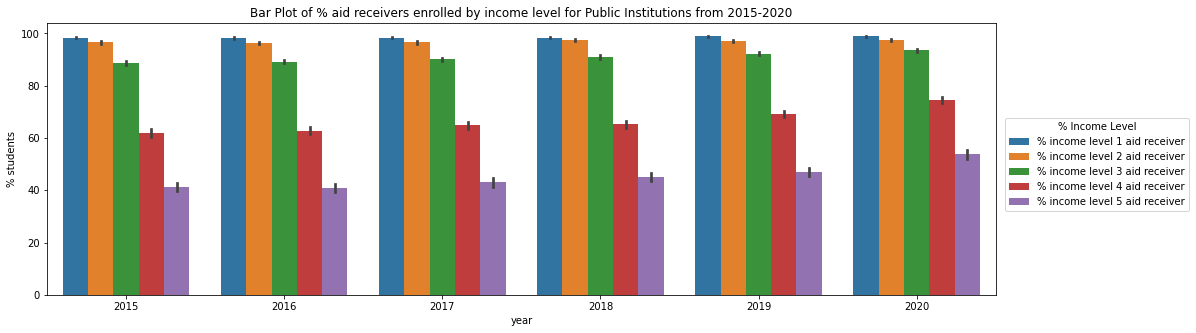

In [22]:
plt.figure(figsize=(17,5))
sns.barplot(x="year", y="% students", hue='income_level_aid_receiver', data=aid_receiver).set(title='Bar Plot of % aid receivers enrolled by income level for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.65),loc='upper left', title='% Income Level', borderaxespad=0)

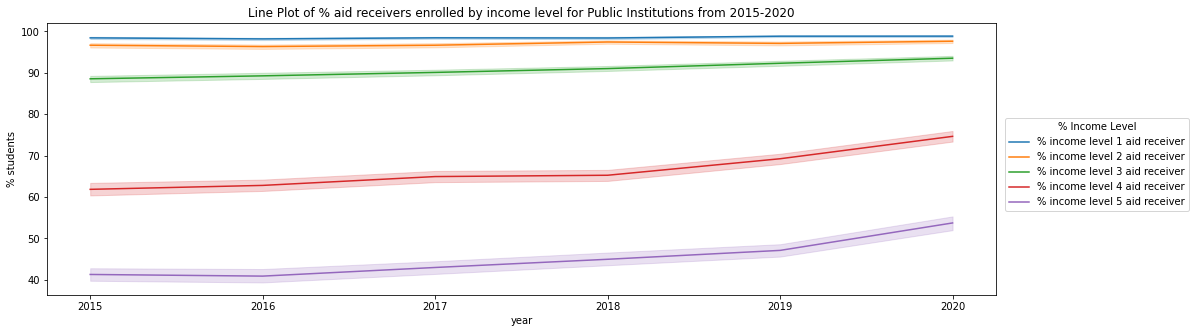

In [23]:
plt.figure(figsize=(17,5))
sns.lineplot(x="year", y="% students", hue='income_level_aid_receiver', data=aid_receiver).set(title='Line Plot of % aid receivers enrolled by income level for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.65),loc='upper left', title='% Income Level', borderaxespad=0)

In [24]:
US_income = pd.read_csv('/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/US_income.csv')

In [25]:
US_income.head()

,year,%US_Level 1,%US_Level 2,%US_Level 3,%US_Level 4,%US_Level 5
0,2015,0.2375,0.14790,0.177600,0.1524,0.2016
1,2016,0.2260,0.14500,0.180700,0.1532,0.2028
2,2017,0.2255,0.14477,0.171730,0.1586,0.2014
3,2018,0.2190,0.14170,0.179330,0.1592,0.2038
4,2019,0.2000,0.13790,0.176067,0.1536,0.2174


In [26]:
financial_aid = pd.merge(financial_aid, US_income, on='year', how = 'left')

In [27]:
financial_aid.head()

,unitid,year,% income level 1 aid receiver,% income level 2 aid receiver,% income level 3 aid receiver,% income level 4 aid receiver,% income level 5 aid receiver,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5,%US_Level 1,%US_Level 2,%US_Level 3,%US_Level 4,%US_Level 5
0,100654,2015,0.995876,0.992248,0.868421,0.842105,0.933333,0.624196,0.166023,0.097812,0.048906,0.019305,0.2375,0.1479,0.1776,0.1524,0.2016
1,100663,2015,0.997214,0.972603,0.850746,0.695652,0.703226,0.301681,0.122689,0.112605,0.135294,0.130252,0.2375,0.1479,0.1776,0.1524,0.2016
2,100690,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2375,0.1479,0.1776,0.1524,0.2016
3,100706,2015,1.000000,1.000000,0.666667,0.090909,0.026316,0.162698,0.087302,0.125000,0.130952,0.150794,0.2375,0.1479,0.1776,0.1524,0.2016
4,100724,2015,0.890411,1.000000,1.000000,0.238095,1.000000,0.779359,0.106762,0.072954,0.037367,0.017794,0.2375,0.1479,0.1776,0.1524,0.2016


In [28]:
financial_aid = pd.merge(financial_aid, ins_list, on='unitid', how = 'left')

In [29]:
ins_list['institution_type'].value_counts()

Private for-profit        5219
Private not-for-profit    2895
Public                    2770
Name: institution_type, dtype: int64

In [30]:
financial_aid[(financial_aid['institution_type'] == 'Private for-profit') & (~financial_aid['% income level 1'].isna())]

,unitid,year,% income level 1 aid receiver,% income level 2 aid receiver,% income level 3 aid receiver,% income level 4 aid receiver,% income level 5 aid receiver,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5,%US_Level 1,%US_Level 2,%US_Level 3,%US_Level 4,%US_Level 5,institution_type
8154,460808,2015,1.000000,0.666667,NaN,NaN,NaN,0.793103,0.310345,0.0,0.0,0.0,0.2375,0.14790,0.17760,0.1524,0.2016,Private for-profit
8155,460808,2015,1.000000,0.666667,NaN,NaN,NaN,0.793103,0.310345,0.0,0.0,0.0,0.2375,0.14790,0.17760,0.1524,0.2016,Private for-profit
17041,460808,2016,1.000000,1.000000,NaN,NaN,NaN,0.066667,0.933333,0.0,0.0,0.0,0.2260,0.14500,0.18070,0.1532,0.2028,Private for-profit
17042,460808,2016,1.000000,1.000000,NaN,NaN,NaN,0.066667,0.933333,0.0,0.0,0.0,0.2260,0.14500,0.18070,0.1532,0.2028,Private for-profit
25779,460808,2017,1.000000,1.000000,NaN,NaN,NaN,0.285714,0.714286,0.0,0.0,0.0,0.2255,0.14477,0.17173,0.1586,0.2014,Private for-profit
25780,460808,2017,1.000000,1.000000,NaN,NaN,NaN,0.285714,0.714286,0.0,0.0,0.0,0.2255,0.14477,0.17173,0.1586,0.2014,Private for-profit
29520,181400,2018,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,0.0,0.2190,0.14170,0.17933,0.1592,0.2038,Private for-profit
32085,260901,2018,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,0.0,0.2190,0.14170,0.17933,0.1592,0.2038,Private for-profit
32087,260910,2018,NaN,NaN,1.0,NaN,NaN,0.000000,0.000000,1.0,0.0,0.0,0.2190,0.14170,0.17933,0.1592,0.2038,Private for-profit
32189,367024,2018,1.000000,1.000000,1.0,NaN,NaN,0.166667,0.166667,0.5,0.0,0.0,0.2190,0.14170,0.17933,0.1592,0.2038,Private for-profit


In [31]:
gini_income = financial_aid.loc[:, ['unitid','year','% income level 1','% income level 2','% income level 3',	'% income level 4',	'% income level 5',	'%US_Level 1','%US_Level 2',	'%US_Level 3',	'%US_Level 4',	'%US_Level 5']]

In [32]:
gini_income['level_1'] = gini_income['% income level 1']/gini_income['%US_Level 1']
gini_income['level_2'] = gini_income['% income level 2']/gini_income['%US_Level 2']
gini_income['level_3'] = gini_income['% income level 3']/gini_income['%US_Level 3']
gini_income['level_4'] = gini_income['% income level 4']/gini_income['%US_Level 4']
gini_income['level_5'] = gini_income['% income level 5']/gini_income['%US_Level 5']

In [33]:
gini_income['normalized_level_1']=(gini_income['level_1'] - gini_income['level_1'].min()) / (gini_income['level_1'].max() - gini_income['level_1'].min())
gini_income['normalized_level_2']=(gini_income['level_2'] - gini_income['level_2'].min()) / (gini_income['level_2'].max() - gini_income['level_2'].min())
gini_income['normalized_level_3']=(gini_income['level_3'] - gini_income['level_3'].min()) / (gini_income['level_3'].max() - gini_income['level_3'].min())
gini_income['normalized_level_4']=(gini_income['level_4'] - gini_income['level_4'].min()) / (gini_income['level_4'].max() - gini_income['level_4'].min())
gini_income['normalized_level_5']=(gini_income['level_5'] - gini_income['level_5'].min()) / (gini_income['level_5'].max() - gini_income['level_5'].min())

In [34]:
gini_income.head()

,unitid,year,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5,%US_Level 1,%US_Level 2,%US_Level 3,...,level_1,level_2,level_3,level_4,level_5,normalized_level_1,normalized_level_2,normalized_level_3,normalized_level_4,normalized_level_5
0,100654,2015,0.624196,0.166023,0.097812,0.048906,0.019305,0.2375,0.1479,0.1776,...,2.628192,1.122537,0.550744,0.320906,0.095759,0.184411,0.040692,0.094579,0.048906,0.016165
1,100663,2015,0.301681,0.122689,0.112605,0.135294,0.130252,0.2375,0.1479,0.1776,...,1.270234,0.829541,0.634037,0.887757,0.646092,0.089128,0.030071,0.108883,0.135294,0.109063
2,100663,2015,0.301681,0.122689,0.112605,0.135294,0.130252,0.2375,0.1479,0.1776,...,1.270234,0.829541,0.634037,0.887757,0.646092,0.089128,0.030071,0.108883,0.135294,0.109063
3,100690,2015,NaN,NaN,NaN,NaN,NaN,0.2375,0.1479,0.1776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100690,2015,NaN,NaN,NaN,NaN,NaN,0.2375,0.1479,0.1776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
gini_income['Gini_income'] = 1- (gini_income['normalized_level_1']**2 + gini_income['normalized_level_2']**2 + gini_income['normalized_level_3']**2 +gini_income['normalized_level_4']**2 + gini_income['normalized_level_5']**2)

In [36]:
gini_income.head()

,unitid,year,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5,%US_Level 1,%US_Level 2,%US_Level 3,...,level_2,level_3,level_4,level_5,normalized_level_1,normalized_level_2,normalized_level_3,normalized_level_4,normalized_level_5,Gini_income
0,100654,2015,0.624196,0.166023,0.097812,0.048906,0.019305,0.2375,0.1479,0.1776,...,1.122537,0.550744,0.320906,0.095759,0.184411,0.040692,0.094579,0.048906,0.016165,0.952738
1,100663,2015,0.301681,0.122689,0.112605,0.135294,0.130252,0.2375,0.1479,0.1776,...,0.829541,0.634037,0.887757,0.646092,0.089128,0.030071,0.108883,0.135294,0.109063,0.949097
2,100663,2015,0.301681,0.122689,0.112605,0.135294,0.130252,0.2375,0.1479,0.1776,...,0.829541,0.634037,0.887757,0.646092,0.089128,0.030071,0.108883,0.135294,0.109063,0.949097
3,100690,2015,NaN,NaN,NaN,NaN,NaN,0.2375,0.1479,0.1776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100690,2015,NaN,NaN,NaN,NaN,NaN,0.2375,0.1479,0.1776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ins_list = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/institution_type.csv")

In [38]:
ins_list = ins_list.drop(columns = ['Unnamed: 0'])

In [39]:
ins_list.head()

,unitid,institution_type
0,100654,Public
1,100663,Public
2,100690,Private not-for-profit
3,100706,Public
4,100724,Public


In [40]:
gini_income = pd.merge(gini_income, ins_list, on = 'unitid', how = 'left')

In [41]:
gini_income = gini_income.drop_duplicates()
gini_income.head()

,unitid,year,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5,%US_Level 1,%US_Level 2,%US_Level 3,...,level_3,level_4,level_5,normalized_level_1,normalized_level_2,normalized_level_3,normalized_level_4,normalized_level_5,Gini_income,institution_type
0,100654,2015,0.624196,0.166023,0.097812,0.048906,0.019305,0.2375,0.1479,0.1776,...,0.550744,0.320906,0.095759,0.184411,0.040692,0.094579,0.048906,0.016165,0.952738,Public
1,100663,2015,0.301681,0.122689,0.112605,0.135294,0.130252,0.2375,0.1479,0.1776,...,0.634037,0.887757,0.646092,0.089128,0.030071,0.108883,0.135294,0.109063,0.949097,Public
5,100690,2015,NaN,NaN,NaN,NaN,NaN,0.2375,0.1479,0.1776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private not-for-profit
9,100706,2015,0.162698,0.087302,0.125000,0.130952,0.150794,0.2375,0.1479,0.1776,...,0.703829,0.859268,0.747984,0.048067,0.021397,0.120869,0.130952,0.126263,0.949532,Public
13,100724,2015,0.779359,0.106762,0.072954,0.037367,0.017794,0.2375,0.1479,0.1776,...,0.410776,0.245187,0.088262,0.230253,0.026167,0.070542,0.037367,0.014899,0.939704,Public


In [42]:
gini_income[(gini_income['institution_type'] == 'Private not-for-profit') & (~gini_income['Gini_income'].isna())]

,unitid,year,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5,%US_Level 1,%US_Level 2,%US_Level 3,...,level_3,level_4,level_5,normalized_level_1,normalized_level_2,normalized_level_3,normalized_level_4,normalized_level_5,Gini_income,institution_type
18594,165884,2016,0.536842,0.147368,0.100000,0.057895,0.052632,0.2260,0.14500,0.180700,...,0.553403,0.377903,0.259525,0.166674,0.036842,0.095036,0.057592,0.043809,0.956594,Private not-for-profit
33532,165884,2017,0.458763,0.159794,0.123711,0.103093,0.036082,0.2255,0.14477,0.171730,...,0.720383,0.650018,0.179158,0.142749,0.040012,0.123711,0.099063,0.030243,0.951989,Private not-for-profit
40174,434016,2017,0.842105,0.105263,0.052632,0.000000,0.000000,0.2255,0.14477,0.171730,...,0.306479,0.000000,0.000000,0.262030,0.026358,0.052632,0.000000,0.000000,0.927876,Private not-for-profit
54725,434016,2018,0.722222,0.194444,0.083333,0.000000,0.000000,0.2190,0.14170,0.179330,...,0.464693,0.000000,0.000000,0.231397,0.049743,0.079802,0.000000,0.000000,0.937613,Private not-for-profit
63364,180647,2019,0.495238,0.123810,0.085714,0.009524,0.000000,0.2000,0.13790,0.176067,...,0.486828,0.062004,0.000000,0.173746,0.032546,0.083603,0.009449,0.000000,0.961674,Private not-for-profit
65764,219374,2019,0.850000,0.150000,0.000000,0.000000,0.000000,0.2000,0.13790,0.176067,...,0.000000,0.000000,0.000000,0.298208,0.039431,0.000000,0.000000,0.000000,0.909517,Private not-for-profit
66483,231837,2019,0.241935,0.161290,0.145161,0.193548,0.145161,0.2000,0.13790,0.176067,...,0.824466,1.260081,0.667715,0.084879,0.042399,0.141586,0.192036,0.112713,0.921369,Private not-for-profit
68707,434016,2019,0.593750,0.156250,0.062500,0.000000,0.000000,0.2000,0.13790,0.176067,...,0.354979,0.000000,0.000000,0.208307,0.041074,0.060960,0.000000,0.000000,0.951205,Private not-for-profit
77102,180647,2020,0.582418,0.109890,0.098901,0.043956,0.000000,0.2105,0.14000,0.180467,...,0.548029,0.288047,0.000000,0.194139,0.028454,0.094113,0.043898,0.000000,0.950716,Private not-for-profit
79479,219374,2020,0.840000,0.080000,0.080000,0.000000,0.000000,0.2105,0.14000,0.180467,...,0.443294,0.000000,0.000000,0.280000,0.020714,0.076127,0.000000,0.000000,0.915376,Private not-for-profit


In [43]:
income_percentage = gini_income.loc[:,['year','institution_type','% income level 1','% income level 2','% income level 3',	'% income level 4',	'% income level 5']]

In [44]:
income_percentage = income_percentage[income_percentage['institution_type']!= 'Private for-profit']

In [45]:
income_percentage.head()

,year,institution_type,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5
0,2015,Public,0.624196,0.166023,0.097812,0.048906,0.019305
1,2015,Public,0.301681,0.122689,0.112605,0.135294,0.130252
5,2015,Private not-for-profit,NaN,NaN,NaN,NaN,NaN
9,2015,Public,0.162698,0.087302,0.125000,0.130952,0.150794
13,2015,Public,0.779359,0.106762,0.072954,0.037367,0.017794


In [46]:
public = income_percentage[income_percentage['institution_type'] == 'Public'].drop(columns = ['institution_type'])
public.head()

,year,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5
0,2015,0.624196,0.166023,0.097812,0.048906,0.019305
1,2015,0.301681,0.122689,0.112605,0.135294,0.130252
9,2015,0.162698,0.087302,0.125000,0.130952,0.150794
13,2015,0.779359,0.106762,0.072954,0.037367,0.017794
14,2015,0.200745,0.101704,0.105431,0.111289,0.163472


In [47]:
private = income_percentage[income_percentage['institution_type'] == 'Private not-for-profit'].drop(columns = ['institution_type'])
private.head()

,year,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5
5,2015,NaN,NaN,NaN,NaN,NaN
25,2015,NaN,NaN,NaN,NaN,NaN
30,2015,NaN,NaN,NaN,NaN,NaN
43,2015,NaN,NaN,NaN,NaN,NaN
63,2015,NaN,NaN,NaN,NaN,NaN


In [48]:
public_new = public.melt('year', var_name = 'income_level', value_name='% students')
private_new = private.melt('year', var_name = 'income_level', value_name='% students')

In [49]:
public_new.head()

,year,income_level,% students
0,2015,% income level 1,0.624196
1,2015,% income level 1,0.301681
2,2015,% income level 1,0.162698
3,2015,% income level 1,0.779359
4,2015,% income level 1,0.200745


In [50]:
public_new['% students'] = public_new['% students']*100
private_new['% students'] = private_new['% students']*100

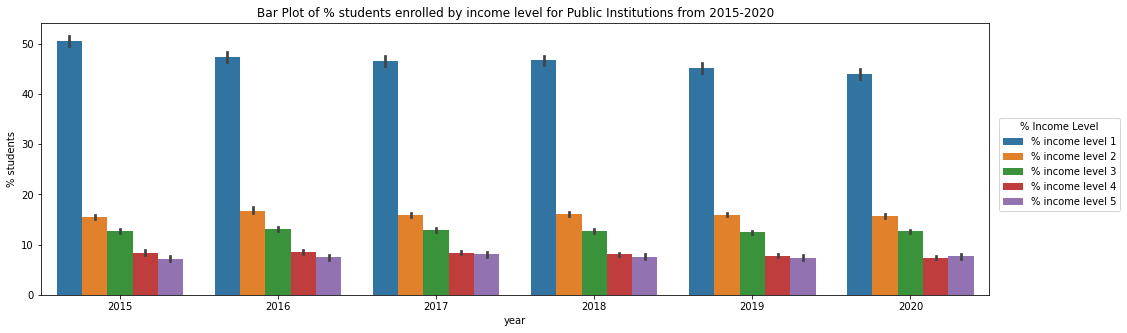

In [51]:
plt.figure(figsize=(17,5))
sns.barplot(x="year", y="% students", hue='income_level', data=public_new).set(title='Bar Plot of % students enrolled by income level for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.65),loc='upper left', title='% Income Level', borderaxespad=0)

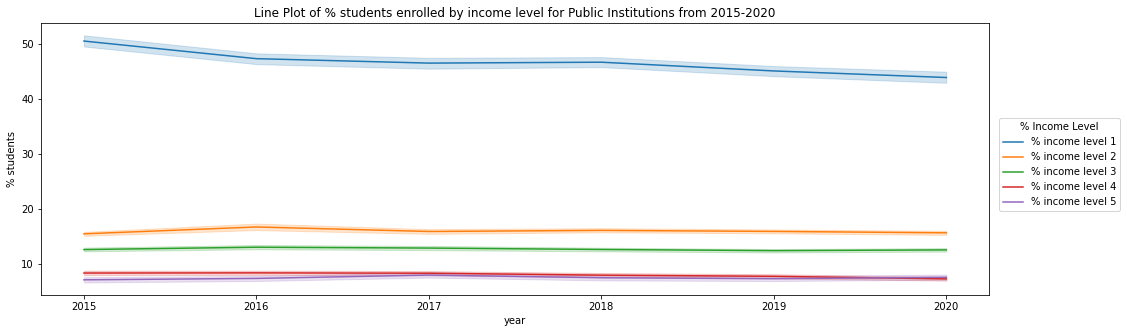

In [52]:
plt.figure(figsize=(17,5))
sns.lineplot(x="year", y="% students", hue='income_level', data=public_new).set(title='Line Plot of % students enrolled by income level for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.65),loc='upper left', title='% Income Level', borderaxespad=0)

In [ ]:
gini_income.to_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/gini_income.csv")